# Python Class Definition For Custom Testing

In [1]:

import torch
from exp.exp_main import Exp_Main
from collections import namedtuple
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

class Train_Tester:
    def __init__(self, **kwargs):

        self.is_training = kwargs.get('is_training', 1)
        self.train_only = kwargs.get('train_only', False)
        self.model_id = kwargs.get('model_id', 'test')
        self.model = kwargs.get('model', 'Autoformer')
        self.saved_model_path = kwargs.get('saved_model_path', None)

        self.data = kwargs.get('data', 'ETTm1')
        self.root_path = kwargs.get('root_path', './data/ETT/')
        self.data_path = kwargs.get('data_path', 'ETTh1.csv')
        self.features = kwargs.get('features', 'M')
        self.target = kwargs.get('target', 'close')
        self.freq = kwargs.get('freq', 'h')
        self.checkpoints = kwargs.get('checkpoints', './checkpoints/')

        self.seq_len = kwargs.get('seq_len', 96)
        self.label_len = kwargs.get('label_len', 48)
        self.pred_len = kwargs.get('pred_len', 96)

        self.individual = kwargs.get('individual', False)
        self.embed_type = kwargs.get('embed_type', 0)
        self.enc_in = kwargs.get('enc_in', 7)
        self.dec_in = kwargs.get('dec_in', 7)
        self.c_out = kwargs.get('c_out', 7)
        self.d_model = kwargs.get('d_model', 512)
        self.n_heads = kwargs.get('n_heads', 8)
        self.e_layers = kwargs.get('e_layers', 2)
        self.d_layers = kwargs.get('d_layers', 1)
        self.d_ff = kwargs.get('d_ff', 2048)
        self.moving_avg = kwargs.get('moving_avg', 25)
        self.factor = kwargs.get('factor', 1)
        self.distil = kwargs.get('distil', True)
        self.dropout = kwargs.get('dropout', 0.05)
        self.embed = kwargs.get('embed', 'timeF')
        self.activation = kwargs.get('activation', 'gelu')
        self.output_attention = kwargs.get('output_attention', False)
        self.do_predict = kwargs.get('do_predict', False)
        self.do_custom_predict = kwargs.get('do_custom_predict', False)

        self.num_workers = kwargs.get('num_workers', 10)
        self.itr = kwargs.get('itr', 2)
        self.train_epochs = kwargs.get('train_epochs', 10)
        self.batch_size = kwargs.get('batch_size', 32)
        self.patience = kwargs.get('patience', 3)
        self.learning_rate = kwargs.get('learning_rate', 0.0001)
        self.des = kwargs.get('des', 'test')
        self.loss = kwargs.get('loss', 'mse')
        self.lradj = kwargs.get('lradj', 'type1')
        self.use_amp = kwargs.get('use_amp', False)

        self.use_gpu = kwargs.get('use_gpu', True)
        self.gpu = kwargs.get('gpu', 0)
        self.use_multi_gpu = kwargs.get('use_multi_gpu', False)
        self.devices = kwargs.get('devices', '0,1,2,3')
        self.test_flop = kwargs.get('test_flop', False)

        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

        self.exp = Exp_Main

    def _plot(self, trues, preds):
        plt.figure(figsize=(12,6))
        plt.plot(trues, label='True', linewidth=0.5)
        plt.plot(preds, label='Predicted', linewidth=0.5)
        plt.title("Model Per. on Test Set")
        plt.legend()
        plt.show()

    def test(self):
        Args = namedtuple('Args', ['is_training', 'train_only', 'model_id', 'model', 'saved_model_path',
                                'data', 'root_path', 'data_path', 'features', 'target', 'freq', 'checkpoints',
                                'seq_len', 'label_len', 'pred_len', 'individual', 'embed_type', 'enc_in',
                                'dec_in', 'c_out', 'd_model', 'n_heads', 'e_layers', 'd_layers', 'd_ff',
                                'moving_avg', 'factor', 'distil', 'dropout', 'embed', 'activation',
                                'output_attention', 'do_predict', 'do_custom_predict', 'num_workers', 'itr',
                                'train_epochs', 'batch_size', 'patience', 'learning_rate', 'des', 'loss',
                                'lradj', 'use_amp', 'use_gpu', 'gpu', 'use_multi_gpu', 'devices', 'test_flop'])

        args = Args(is_training=self.is_training, train_only=self.train_only, model_id=self.model_id,
                    model=self.model, saved_model_path=self.saved_model_path, data=self.data,
                    root_path=self.root_path, data_path=self.data_path, features=self.features,
                    target=self.target, freq=self.freq, checkpoints=self.checkpoints, seq_len=self.seq_len,
                    label_len=self.label_len, pred_len=self.pred_len, individual=self.individual,
                    embed_type=self.embed_type, enc_in=self.enc_in, dec_in=self.dec_in, c_out=self.c_out,
                    d_model=self.d_model, n_heads=self.n_heads, e_layers=self.e_layers, d_layers=self.d_layers,
                    d_ff=self.d_ff, moving_avg=self.moving_avg, factor=self.factor, distil=self.distil,
                    dropout=self.dropout, embed=self.embed, activation=self.activation,
                    output_attention=self.output_attention, do_predict=self.do_predict,
                    do_custom_predict=self.do_custom_predict, num_workers=self.num_workers, itr=self.itr,
                    train_epochs=self.train_epochs, batch_size=self.batch_size, patience=self.patience,
                    learning_rate=self.learning_rate, des=self.des, loss=self.loss, lradj=self.lradj,
                    use_amp=self.use_amp, use_gpu=self.use_gpu, gpu=self.gpu, use_multi_gpu=self.use_multi_gpu,
                    devices=self.devices, test_flop=self.test_flop)


        self.exp = Exp_Main(args)
        preds, trues, mse, mae = self.exp.custom_predict(args.saved_model_path)
        print(f'MSE: {mse} MAE: {mae}')
        preds = preds[:, -1].reshape(-1, 1)
        trues = trues[:, -1].reshape(-1, 1)
        self._plot(trues, preds)
        


        return preds, trues, mse, mae

/home/ec22344/miniconda3/envs/LTSF_Linear/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# DLinear Model Testing

## Close Col Only

#### Close Column Only (Input: last 12 data points, Output: the next first future data)

Use GPU: cuda:0
Length of data_x: 4989
seq_len: 12
custom_pred 4978
Scaled back
shape of data: (1 feature) before returning (4978, 1)
shape of data: (1 feature) before returning (4978, 1)
MSE: 11342.5869140625 MAE: 68.24221801757812


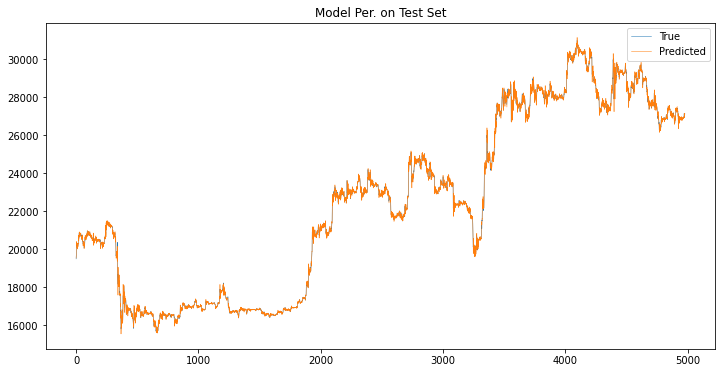

In [2]:
args_dict = {
    "root_path": "../../../data/",
    "data_path": "testing_data_close_col_only_for_other_models.csv",
    "model_id": "d_linear_btc_12_1_1_close_only",
    "saved_model_path": "checkpoints/d_linear_btc_12_1_1_close_only_DLinear_custom_ftMS_sl12_ll1_pl1_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0/checkpoint.pth",
    "model": "DLinear",
    "data": "custom",
    "seq_len": 12,
    "label_len": 1,
    "pred_len": 1,
    "enc_in": 1,
    "individual": True,
    "use_gpu": 1,
    "batch_size": 1,
    "devices": "0,3",
}

linear_model_tester = Train_Tester(**args_dict)
preds, trues, mse, mae = linear_model_tester.test()

#### Close Column Only (Input: last 12 data points, Output: the next 12th future data)

Use GPU: cuda:0
Length of data_x: 4978
seq_len: 12
custom_pred 4967
Scaled back
shape of data: (1 feature) before returning (59604, 1)
shape of data: (1 feature) before returning (59604, 1)
MSE: 83550.6171875 MAE: 169.06661987304688


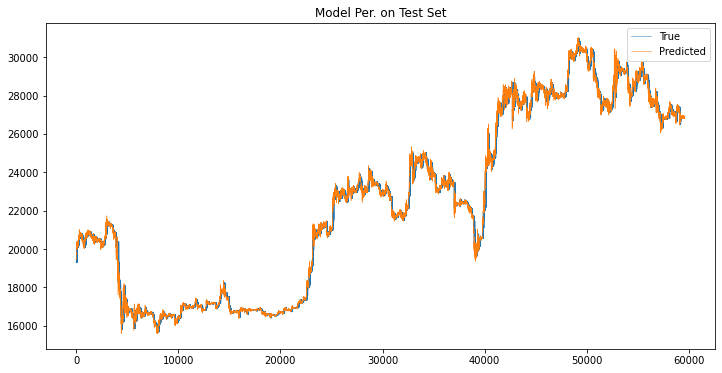

In [3]:
args_dict = {
    "root_path": "../../../data/",
    "data_path": "testing_data_close_col_only_for_other_models.csv",
    "model_id": "d_linear_btc_12_12_12_close_only",
    "saved_model_path": "checkpoints/d_linear_btc_12_12_12_close_only_DLinear_custom_ftMS_sl12_ll12_pl12_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0/checkpoint.pth",
    "model": "DLinear",
    "data": "custom",
    "seq_len": 12,
    "label_len": 12,
    "pred_len": 12,
    "enc_in": 1,
    "individual": True,
    "use_gpu": 1,
    "batch_size": 1,
    "devices": "0,3",
}

linear_model_tester = Train_Tester(**args_dict)
preds, trues, mse, mae = linear_model_tester.test()

#### Close Column Only (Input: last 96 data points, Output: the next first future data)

Use GPU: cuda:0
Length of data_x: 4989
seq_len: 96
custom_pred 4894
Scaled back
shape of data: (1 feature) before returning (4894, 1)
shape of data: (1 feature) before returning (4894, 1)
MSE: 4252488.0 MAE: 1442.8682861328125


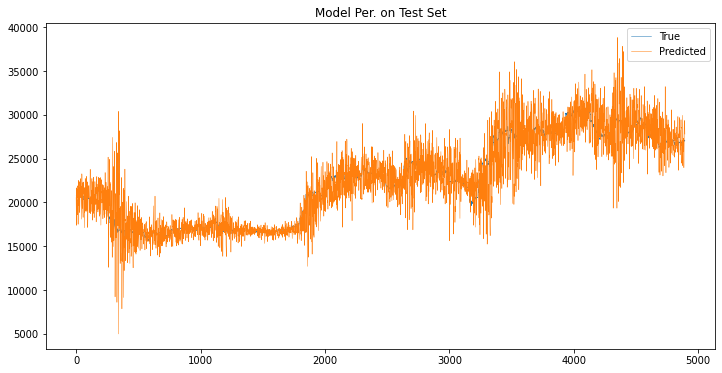

In [4]:
args_dict = {
    "root_path": "../../../data/",
    "data_path": "testing_data_close_col_only_for_other_models.csv",
    "model_id": "d_linear_btc_96_1_1_close_only",
    "saved_model_path": "checkpoints/d_linear_btc_96_1_1_close_only_DLinear_custom_ftMS_sl96_ll1_pl1_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0/checkpoint.pth",
    "model": "DLinear",
    "data": "custom",
    "seq_len": 96,
    "label_len": 1,
    "pred_len": 1,
    "enc_in": 1,
    "individual": True,
    "use_gpu": 1,
    "batch_size": 1,
    "devices": "0,3",
}

linear_model_tester = Train_Tester(**args_dict)
preds, trues, mse, mae = linear_model_tester.test()

#### Close Column Only (Input: last 96 data points, Output: the next 12th future data)

Use GPU: cuda:0
Length of data_x: 4978
seq_len: 96
custom_pred 4883
Scaled back
shape of data: (1 feature) before returning (58596, 1)
shape of data: (1 feature) before returning (58596, 1)
MSE: 3218322.25 MAE: 1249.4765625


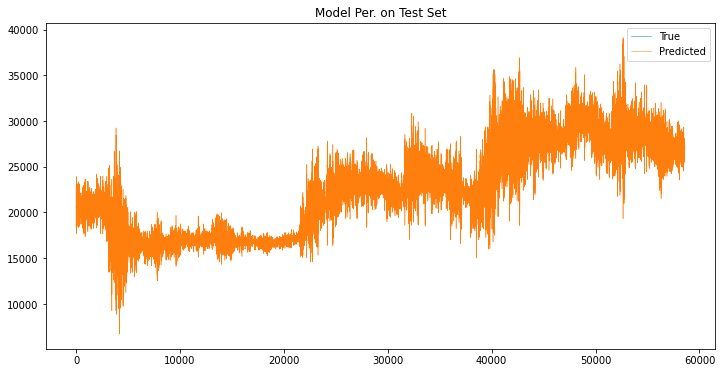

In [5]:
args_dict = {
    "root_path": "../../../data/",
    "data_path": "testing_data_close_col_only_for_other_models.csv",
    "model_id": "d_linear_btc_96_12_12_close_only",
    "saved_model_path": "checkpoints/d_linear_btc_96_12_12_close_only_DLinear_custom_ftMS_sl96_ll12_pl12_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0/checkpoint.pth",
    "model": "DLinear",
    "data": "custom",
    "seq_len": 96,
    "label_len": 12,
    "pred_len": 12,
    "enc_in": 1,
    "individual": True,
    "use_gpu": 1,
    "batch_size": 1,
    "devices": "0,3",
}

linear_model_tester = Train_Tester(**args_dict)
preds, trues, mse, mae = linear_model_tester.test()

#### Close Column Only (Input: last 504 data points (1 week), Output: the next 12th future data)

Use GPU: cuda:0
Length of data_x: 4978
seq_len: 504
custom_pred 4475
Scaled back
shape of data: (1 feature) before returning (53700, 1)
shape of data: (1 feature) before returning (53700, 1)
MSE: 229810880.0 MAE: 11505.36328125


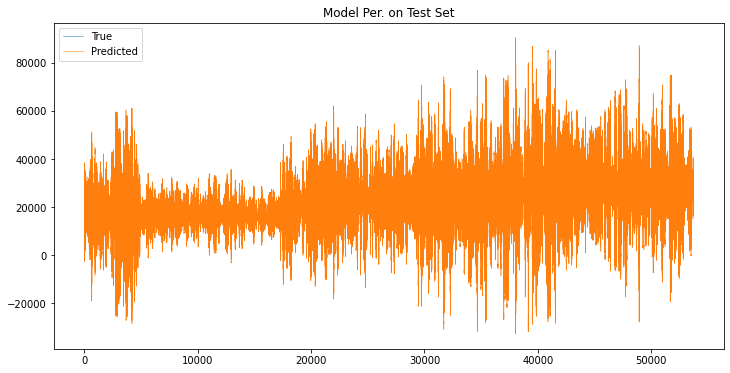

In [6]:
args_dict = {
    "root_path": "../../../data/",
    "data_path": "testing_data_close_col_only_for_other_models.csv",
    "model_id": "d_linear_btc_504_12_12_close_only",
    "saved_model_path": "checkpoints/d_linear_btc_504_12_12_close_only_DLinear_custom_ftMS_sl504_ll12_pl12_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0/checkpoint.pth",
    "model": "DLinear",
    "data": "custom",
    "seq_len": 504,
    "label_len": 12,
    "pred_len": 12,
    "enc_in": 1,
    "individual": True,
    "use_gpu": 1,
    "batch_size": 1,
    "devices": "0,3",
}

linear_model_tester = Train_Tester(**args_dict)
preds, trues, mse, mae = linear_model_tester.test()

## Top Columns

#### Top Columns (Input: last 12 data points, Output: the next first future data)


Use GPU: cuda:0
Length of data_x: 4989
seq_len: 12
custom_pred 4978
Scaled back
MSE: 3500.111572265625 MAE: 38.25474548339844


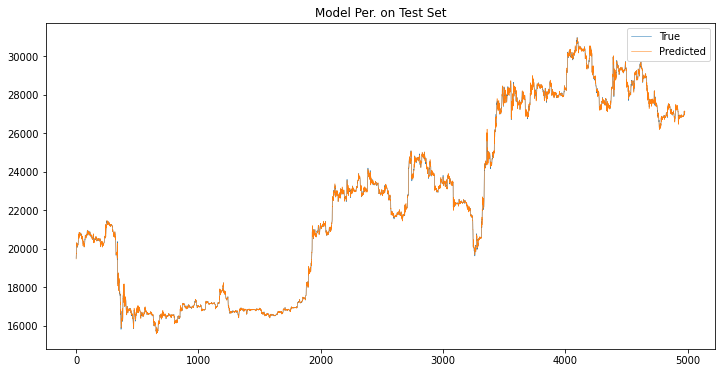

In [7]:
args_dict = {
    "root_path": "../../../data/",
    "data_path": "testing_data_top_features_for_other_models.csv",
    "model_id": "d_linear_btc_12_1_1_top_features",
    "saved_model_path": "checkpoints/d_linear_btc_12_1_1_top_features_DLinear_custom_ftMS_sl12_ll1_pl1_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0/checkpoint.pth",
    "model": "DLinear",
    "data": "custom",
    "seq_len": 12,
    "label_len": 1,
    "pred_len": 1,
    "enc_in": 11,
    "individual": True,
    "use_gpu": 1,
    "batch_size": 1,
    "devices": "0,3",
}

linear_model_tester = Train_Tester(**args_dict)
preds, trues, mse, mae = linear_model_tester.test()

#### Top Columns (Input: last 12 data points, Output: the next 12th future data)


Use GPU: cuda:0
Length of data_x: 4978
seq_len: 12
custom_pred 4967
Scaled back
MSE: 79940.0078125 MAE: 160.3158416748047


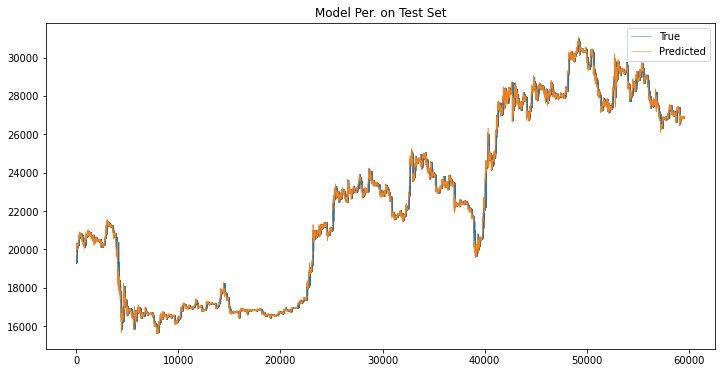

In [8]:
args_dict = {
    "root_path": "../../../data/",
    "data_path": "testing_data_top_features_for_other_models.csv",
    "model_id": "d_linear_btc_12_12_12_top_features",
    "saved_model_path": "checkpoints/d_linear_btc_12_12_12_top_features_DLinear_custom_ftMS_sl12_ll12_pl12_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0/checkpoint.pth",
    "model": "DLinear",
    "data": "custom",
    "seq_len": 12,
    "label_len": 12,
    "pred_len": 12,
    "enc_in": 11,
    "individual": True,
    "use_gpu": 1,
    "batch_size": 1,
    "devices": "0,3",
}

linear_model_tester = Train_Tester(**args_dict)
preds, trues, mse, mae = linear_model_tester.test()

#### Top Columns (Input: last 96 data points, Output: the next first future data)


Use GPU: cuda:0
Length of data_x: 4989
seq_len: 96
custom_pred 4894
Scaled back
MSE: 3986668.5 MAE: 1389.92822265625


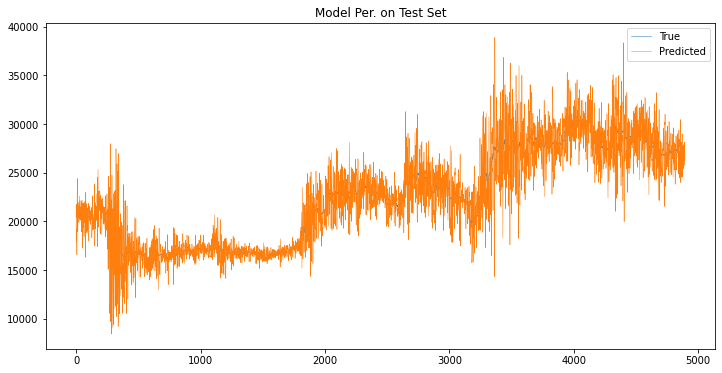

In [9]:
args_dict = {
    "root_path": "../../../data/",
    "data_path": "testing_data_top_features_for_other_models.csv",
    "model_id": "d_linear_btc_96_1_1_top_features",
    "saved_model_path": "checkpoints/d_linear_btc_96_1_1_top_features_DLinear_custom_ftMS_sl96_ll1_pl1_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0/checkpoint.pth",
    "model": "DLinear",
    "data": "custom",
    "seq_len": 96,
    "label_len": 1,
    "pred_len": 1,
    "enc_in": 11,
    "individual": True,
    "use_gpu": 1,
    "batch_size": 1,
    "devices": "0,3",
}

linear_model_tester = Train_Tester(**args_dict)
preds, trues, mse, mae = linear_model_tester.test()

#### Top Columns (Input: last 96 data points, Output: the next 12th future data)


Use GPU: cuda:0
Length of data_x: 4978
seq_len: 96
custom_pred 4883
Scaled back
MSE: 3023244.0 MAE: 1192.6827392578125


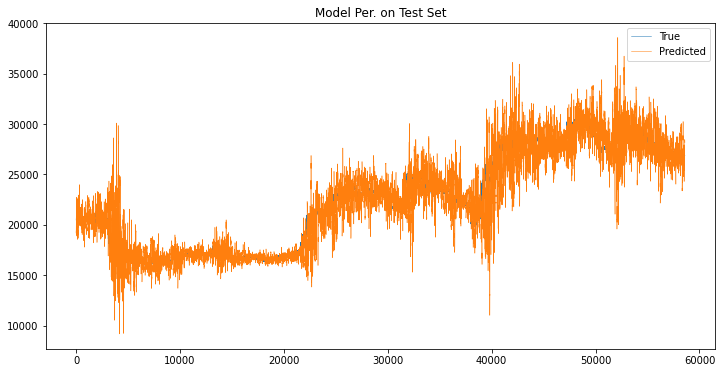

In [10]:
args_dict = {
    "root_path": "../../../data/",
    "data_path": "testing_data_top_features_for_other_models.csv",
    "model_id": "d_linear_btc_96_12_12_top_features",
    "saved_model_path": "checkpoints/d_linear_btc_96_12_12_top_features_DLinear_custom_ftMS_sl96_ll12_pl12_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0/checkpoint.pth",
    "model": "DLinear",
    "data": "custom",
    "seq_len": 96,
    "label_len": 12,
    "pred_len": 12,
    "enc_in": 11,
    "individual": True,
    "use_gpu": 1,
    "batch_size": 1,
    "devices": "0,3",
}

linear_model_tester = Train_Tester(**args_dict)
preds, trues, mse, mae = linear_model_tester.test()

#### Top Columns (Input: last 504 data points, Output: the next 12th future data)


Use GPU: cuda:0
Length of data_x: 4978
seq_len: 504
custom_pred 4475
Scaled back
MSE: 217425840.0 MAE: 11037.6640625


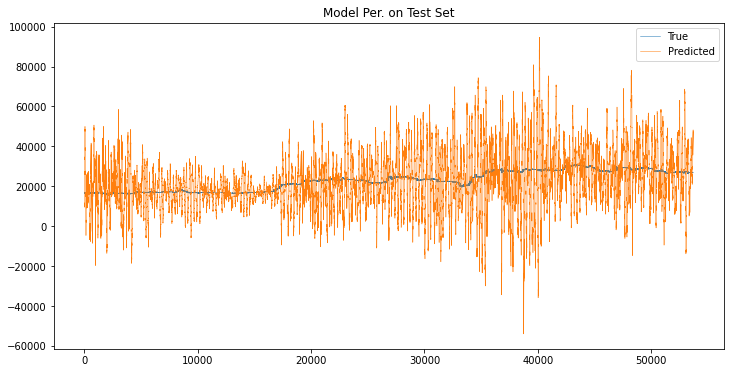

In [11]:
args_dict = {
    "root_path": "../../../data/",
    "data_path": "testing_data_top_features_for_other_models.csv",
    "model_id": "d_linear_btc_504_12_12_top_features",
    "saved_model_path": "checkpoints/d_linear_btc_504_12_12_top_features_DLinear_custom_ftMS_sl504_ll12_pl12_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0/checkpoint.pth",
    "model": "DLinear",
    "data": "custom",
    "seq_len": 504,
    "label_len": 12,
    "pred_len": 12,
    "enc_in": 11,
    "individual": True,
    "use_gpu": 1,
    "batch_size": 1,
    "devices": "0,3",
}

linear_model_tester = Train_Tester(**args_dict)
preds, trues, mse, mae = linear_model_tester.test()

# --------------------------

# NLinear Model Testing

## Close Col Only

#### Close Column Only (Input: last 12 data points, Output: the next first future data)

Use GPU: cuda:0
Length of data_x: 4989
seq_len: 12
custom_pred 4978
Scaled back
shape of data: (1 feature) before returning (4978, 1)
shape of data: (1 feature) before returning (4978, 1)
MSE: 63.321842193603516 MAE: 5.028144836425781


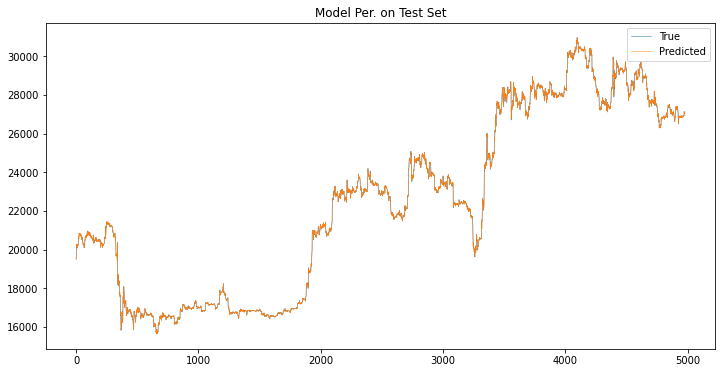

In [12]:
args_dict = {
    "root_path": "../../../data/",
    "data_path": "testing_data_close_col_only_for_other_models.csv",
    "model_id": "n_linear_btc_12_1_1_close_only",
    "saved_model_path": "checkpoints/n_linear_btc_12_1_1_close_only_NLinear_custom_ftMS_sl12_ll1_pl1_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0/checkpoint.pth",
    "model": "NLinear",
    "data": "custom",
    "seq_len": 12,
    "label_len": 1,
    "pred_len": 1,
    "enc_in": 1,
    "individual": True,
    "use_gpu": 1,
    "batch_size": 1,
    "devices": "0,3",
}

linear_model_tester = Train_Tester(**args_dict)
preds, trues, mse, mae = linear_model_tester.test()

#### Close Column Only (Input: last 12 data points, Output: the next 12th future data)

Use GPU: cuda:0
Length of data_x: 4978
seq_len: 12
custom_pred 4967
Scaled back
shape of data: (1 feature) before returning (59604, 1)
shape of data: (1 feature) before returning (59604, 1)
MSE: 78518.703125 MAE: 156.02561950683594


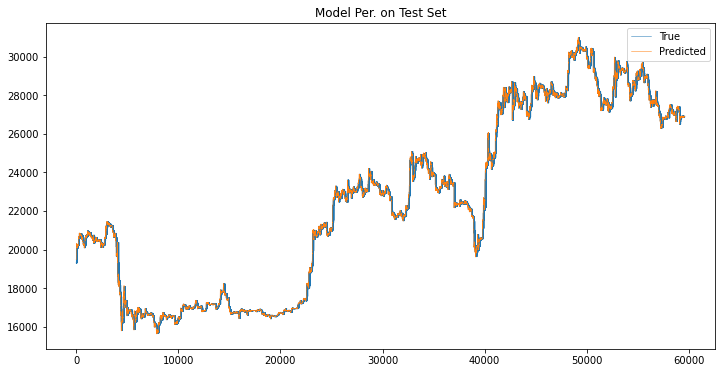

In [13]:
args_dict = {
    "root_path": "../../../data/",
    "data_path": "testing_data_close_col_only_for_other_models.csv",
    "model_id": "n_linear_btc_12_12_12_close_only",
    "saved_model_path": "checkpoints/n_linear_btc_12_12_12_close_only_NLinear_custom_ftMS_sl12_ll12_pl12_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0/checkpoint.pth",
    "model": "NLinear",
    "data": "custom",
    "seq_len": 12,
    "label_len": 12,
    "pred_len": 12,
    "enc_in": 1,
    "individual": True,
    "use_gpu": 1,
    "batch_size": 1,
    "devices": "0,3",
}

linear_model_tester = Train_Tester(**args_dict)
preds, trues, mse, mae = linear_model_tester.test()

#### Close Column Only (Input: last 96 data points, Output: the next first future data)

Use GPU: cuda:0
Length of data_x: 4989
seq_len: 96
custom_pred 4894
Scaled back
shape of data: (1 feature) before returning (4894, 1)
shape of data: (1 feature) before returning (4894, 1)
MSE: 11099.505859375 MAE: 74.03056335449219


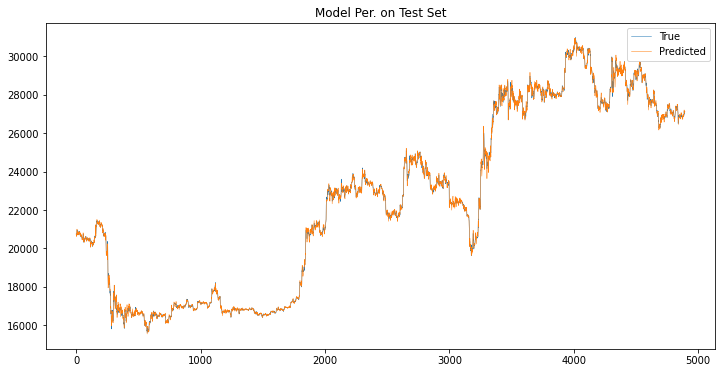

In [14]:
args_dict = {
    "root_path": "../../../data/",
    "data_path": "testing_data_close_col_only_for_other_models.csv",
    "model_id": "n_linear_btc_96_1_1_close_only",
    "saved_model_path": "checkpoints/n_linear_btc_96_1_1_close_only_NLinear_custom_ftMS_sl96_ll1_pl1_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0/checkpoint.pth",
    "model": "NLinear",
    "data": "custom",
    "seq_len": 96,
    "label_len": 1,
    "pred_len": 1,
    "enc_in": 1,
    "individual": True,
    "use_gpu": 1,
    "batch_size": 1,
    "devices": "0,3",
}

linear_model_tester = Train_Tester(**args_dict)
preds, trues, mse, mae = linear_model_tester.test()

#### Close Column Only (Input: last 96 data points, Output: the next 12th future data)

Use GPU: cuda:0
Length of data_x: 4978
seq_len: 96
custom_pred 4883
Scaled back
shape of data: (1 feature) before returning (58596, 1)
shape of data: (1 feature) before returning (58596, 1)
MSE: 96567.5078125 MAE: 192.4941864013672


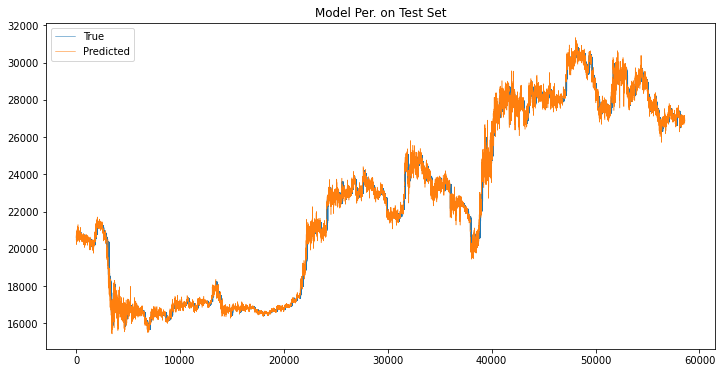

In [15]:
args_dict = {
    "root_path": "../../../data/",
    "data_path": "testing_data_close_col_only_for_other_models.csv",
    "model_id": "n_linear_btc_96_12_12_close_only",
    "saved_model_path": "checkpoints/n_linear_btc_96_12_12_close_only_NLinear_custom_ftMS_sl96_ll12_pl12_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0/checkpoint.pth",
    "model": "NLinear",
    "data": "custom",
    "seq_len": 96,
    "label_len": 12,
    "pred_len": 12,
    "enc_in": 1,
    "individual": True,
    "use_gpu": 1,
    "batch_size": 1,
    "devices": "0,3",
}

linear_model_tester = Train_Tester(**args_dict)
preds, trues, mse, mae = linear_model_tester.test()

#### Close Column Only (Input: last 504 data points (1 week), Output: the next 12th future data)

Use GPU: cuda:0
Length of data_x: 4978
seq_len: 504
custom_pred 4475
Scaled back
shape of data: (1 feature) before returning (53700, 1)
shape of data: (1 feature) before returning (53700, 1)
MSE: 1188066.875 MAE: 742.7947387695312


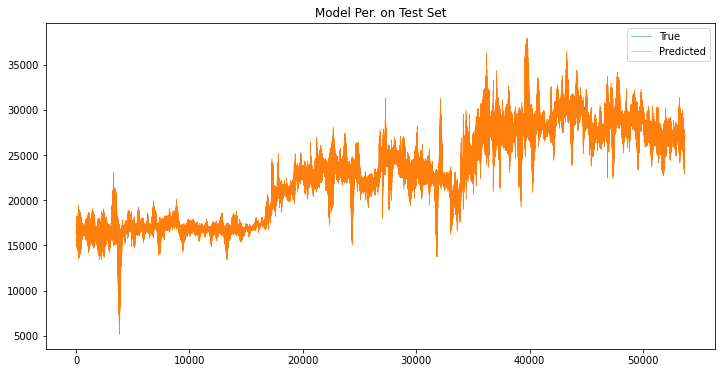

In [16]:
args_dict = {
    "root_path": "../../../data/",
    "data_path": "testing_data_close_col_only_for_other_models.csv",
    "model_id": "n_linear_btc_504_12_12_close_only",
    "saved_model_path": "checkpoints/n_linear_btc_504_12_12_close_only_NLinear_custom_ftMS_sl504_ll12_pl12_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0/checkpoint.pth",
    "model": "NLinear",
    "data": "custom",
    "seq_len": 504,
    "label_len": 12,
    "pred_len": 12,
    "enc_in": 1,
    "individual": True,
    "use_gpu": 1,
    "batch_size": 1,
    "devices": "0,3",
}

linear_model_tester = Train_Tester(**args_dict)
preds, trues, mse, mae = linear_model_tester.test()

## Top Columns

#### Top Columns (Input: last 12 data points, Output: the next first future data)


Use GPU: cuda:0
Length of data_x: 4989
seq_len: 12
custom_pred 4978
Scaled back
MSE: 85.7778091430664 MAE: 5.912359714508057


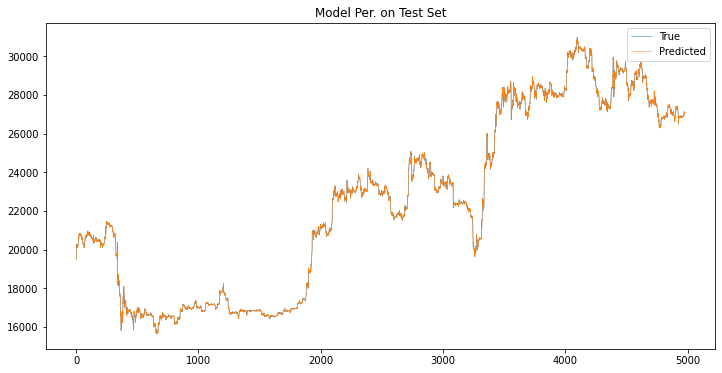

In [17]:
args_dict = {
    "root_path": "../../../data/",
    "data_path": "testing_data_top_features_for_other_models.csv",
    "model_id": "n_linear_btc_12_1_1_top_features",
    "saved_model_path": "checkpoints/n_linear_btc_12_1_1_top_features_NLinear_custom_ftMS_sl12_ll1_pl1_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0/checkpoint.pth",
    "model": "NLinear",
    "data": "custom",
    "seq_len": 12,
    "label_len": 1,
    "pred_len": 1,
    "enc_in": 11,
    "individual": True,
    "use_gpu": 1,
    "batch_size": 1,
    "devices": "0,3",
}

linear_model_tester = Train_Tester(**args_dict)
preds, trues, mse, mae = linear_model_tester.test()

#### Top Columns (Input: last 12 data points, Output: the next 12th future data)


Use GPU: cuda:0
Length of data_x: 4978
seq_len: 12
custom_pred 4967
Scaled back
MSE: 78371.875 MAE: 155.7381591796875


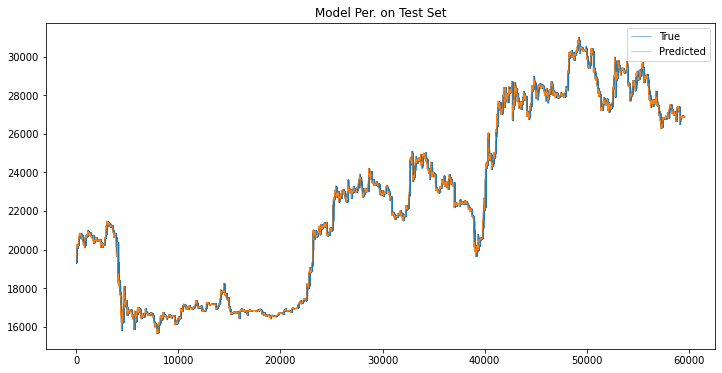

In [18]:
args_dict = {
    "root_path": "../../../data/",
    "data_path": "testing_data_top_features_for_other_models.csv",
    "model_id": "n_linear_btc_12_12_12_top_features",
    "saved_model_path": "checkpoints/n_linear_btc_12_12_12_top_features_NLinear_custom_ftMS_sl12_ll12_pl12_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0/checkpoint.pth",
    "model": "NLinear",
    "data": "custom",
    "seq_len": 12,
    "label_len": 12,
    "pred_len": 12,
    "enc_in": 11,
    "individual": True,
    "use_gpu": 1,
    "batch_size": 1,
    "devices": "0,3",
}

linear_model_tester = Train_Tester(**args_dict)
preds, trues, mse, mae = linear_model_tester.test()

#### Top Columns (Input: last 96 data points, Output: the next first future data)


Use GPU: cuda:0
Length of data_x: 4989
seq_len: 96
custom_pred 4894
Scaled back
MSE: 4850.99072265625 MAE: 49.47180938720703


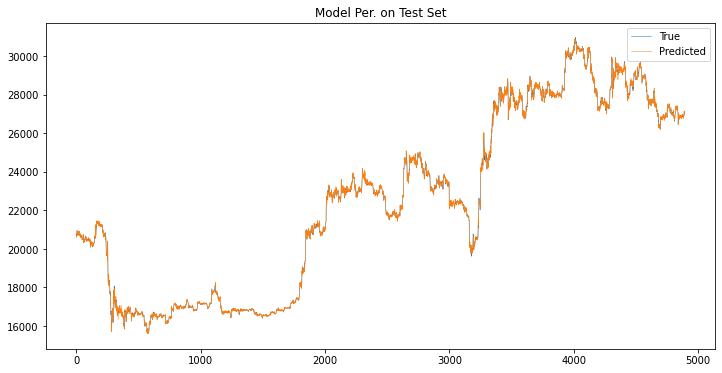

In [19]:
args_dict = {
    "root_path": "../../../data/",
    "data_path": "testing_data_top_features_for_other_models.csv",
    "model_id": "n_linear_btc_96_1_1_top_features",
    "saved_model_path": "checkpoints/n_linear_btc_96_1_1_top_features_NLinear_custom_ftMS_sl96_ll1_pl1_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0/checkpoint.pth",
    "model": "NLinear",
    "data": "custom",
    "seq_len": 96,
    "label_len": 1,
    "pred_len": 1,
    "enc_in": 11,
    "individual": True,
    "use_gpu": 1,
    "batch_size": 1,
    "devices": "0,3",
}

linear_model_tester = Train_Tester(**args_dict)
preds, trues, mse, mae = linear_model_tester.test()

#### Top Columns (Input: last 96 data points, Output: the next 12th future data)


Use GPU: cuda:0
Length of data_x: 4978
seq_len: 96
custom_pred 4883
Scaled back
MSE: 88156.421875 MAE: 177.91212463378906


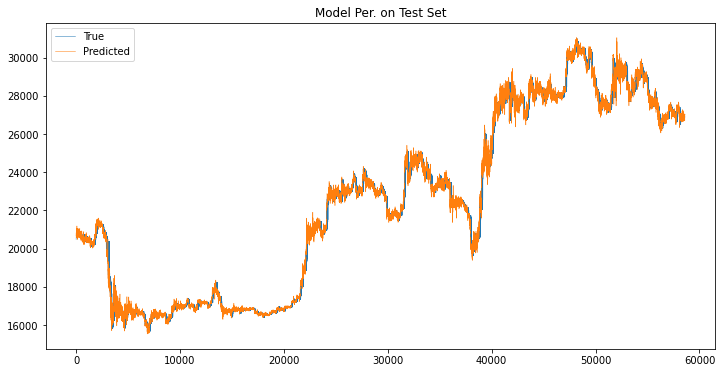

In [20]:
args_dict = {
    "root_path": "../../../data/",
    "data_path": "testing_data_top_features_for_other_models.csv",
    "model_id": "n_linear_btc_96_12_12_top_features",
    "saved_model_path": "checkpoints/n_linear_btc_96_12_12_top_features_NLinear_custom_ftMS_sl96_ll12_pl12_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0/checkpoint.pth",
    "model": "NLinear",
    "data": "custom",
    "seq_len": 96,
    "label_len": 12,
    "pred_len": 12,
    "enc_in": 11,
    "individual": True,
    "use_gpu": 1,
    "batch_size": 1,
    "devices": "0,3",
}

linear_model_tester = Train_Tester(**args_dict)
preds, trues, mse, mae = linear_model_tester.test()

#### Top Columns (Input: last 504 data points, Output: the next 12th future data)


Use GPU: cuda:0
Length of data_x: 4978
seq_len: 504
custom_pred 4475
Scaled back
MSE: 1822908.375 MAE: 828.6154174804688


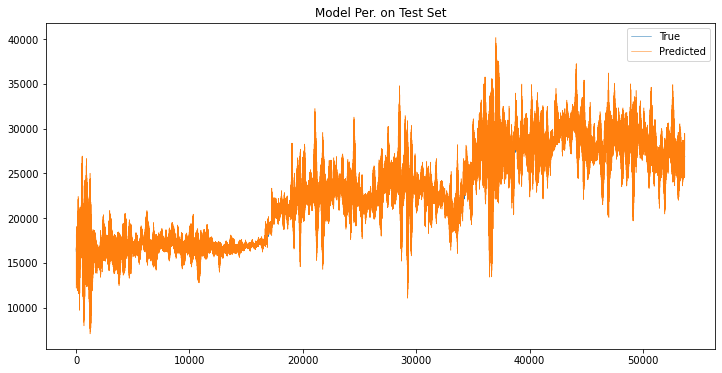

In [21]:
args_dict = {
    "root_path": "../../../data/",
    "data_path": "testing_data_top_features_for_other_models.csv",
    "model_id": "n_linear_btc_504_12_12_top_features",
    "saved_model_path": "checkpoints/n_linear_btc_504_12_12_top_features_NLinear_custom_ftMS_sl504_ll12_pl12_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0/checkpoint.pth",
    "model": "NLinear",
    "data": "custom",
    "seq_len": 504,
    "label_len": 12,
    "pred_len": 12,
    "enc_in": 11,
    "individual": True,
    "use_gpu": 1,
    "batch_size": 1,
    "devices": "0,3",
}

linear_model_tester = Train_Tester(**args_dict)
preds, trues, mse, mae = linear_model_tester.test()

# -------------------------------------------